In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [37]:
house_data = pd.read_excel('data/houses/house_data.xlsx')
house_data.isna().sum()

houseTypes       0
area             0
num_floors    1680
bedrooms      1709
district         0
city             0
price            0
url              0
dtype: int64

In [38]:
house_data.loc[house_data['num_floors'] > 11, 'num_floors'] = None
house_data.isna().sum()

houseTypes       0
area             0
num_floors    1700
bedrooms      1709
district         0
city             0
price            0
url              0
dtype: int64

In [48]:
not_null_houses = house_data.dropna()
full_houses = pd.DataFrame({'area':not_null_houses['area'],'num_floors':not_null_houses['num_floors'],'bedrooms':not_null_houses['bedrooms'],'price':not_null_houses['price']})
full_houses.isna().sum()

area          0
num_floors    0
bedrooms      0
price         0
dtype: int64

In [49]:
i1 = np.random.choice(a=not_null_houses.index, size=200)
# i2 = np.random.choice(a=not_null_houses.index, size=50)
print(i1)
# print(i2)

[4528 4460 1111 5506 3165 4924 4949 1487 3803 5269 5990 3037  577 5565
 2833  352   67 3087 4077 4551 2816 4388 6853  317 7523 6620  963 4367
  949 3303 5936 7709  555 2342 7672 3753 7722 4332 5770 2842 2784 6660
 1844 5379 6345 1464 5684 3412 3128 1919 3784 2395 1815  688 5172 7757
 4027 3383 2508 4838 6434 5403  524 3689 4636 2137 3687 1888 3144  972
 7138 4994 5154 6955 1582 6024 1308 6940 5991 2449  580 1121 8053 4881
 4112 7655 5823  253 5795 6055 1518 5817 1609 3213 6870 4051 6776 4326
 6825 6729 6836 2433 4970 3017 5478 4876 2965 1874  144 5210 7305 7935
 1911 2728 2224 5868 2845 2946 1982 3544 2160 4557 6317 5596  289 4886
 6024 7595 3630 4835 1353 6641 6444 7495 3256 3779 7584 1130 6359 3326
 6282  172 6922  512 1473 5642 7611 7469 2105 7304 5208 2487 2975 7423
 5016 7187 4011 1424 3312  114 4382 4211 3510 1168 7587  535 2707  443
 7622 1579 7376 7028 4954 4255  205 7165 7091 4484 7867  288 3696 1024
 3082 1890 7193 5596 4870 1965 2975 1007 4558 7245 2951 1205 5530 7834
 1198 

In [50]:
null_houses = full_houses.copy()
null_houses.loc[i1, 'num_floors'] = np.nan
null_houses.isna().sum()

area            0
num_floors    197
bedrooms        0
price           0
dtype: int64

In [51]:
null_houses = null_houses.reset_index()

In [52]:
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

rmse = lambda y, yhat: np.sqrt(mean_squared_error(y, yhat))

imputer_test = KNNImputer(n_neighbors=13)
imputed_test = imputer_test.fit_transform(null_houses)
df_imputed_test = pd.DataFrame(imputed_test, columns=null_houses.columns)

In [57]:
full_houses.to_excel('full_houses.xlsx', index=False)

In [58]:
df_imputed_test.to_excel('df_imputed_test.xlsx', index=False)

In [55]:
print(df_imputed_test['num_floors'])

0       3.0
1       5.0
2       1.0
3       3.0
4       2.0
       ... 
5300    3.0
5301    4.0
5302    3.0
5303    3.0
5304    5.0
Name: num_floors, Length: 5305, dtype: float64


In [59]:
error = rmse(full_houses['num_floors'], df_imputed_test['num_floors'])
print(error)

0.29203626161895413


In [3]:
data = pd.read_excel('clean_data.xlsx')
data = data.drop(['district','city'],axis=True)

In [4]:
data

,area,new_num_floors,new_bedrooms,price,city_encoder,district_encoder,houseTypes_Bán Luxury home,houseTypes_Bán Nhà,houseTypes_Bán Nhà cổ,houseTypes_Bán Nhà mặt phố,houseTypes_Bán Nhà riêng
0,130.0,3,7,9.20,9.292954,8.661038,0,0,0,0,1
1,65.0,2,2,2.90,7.417350,7.708597,0,0,0,0,1
2,90.0,5,5,14.00,11.089988,8.835714,0,0,0,0,1
3,30.0,1,2,3.70,9.292954,6.731978,0,0,0,0,1
4,38.0,3,3,4.40,9.292954,11.315324,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
8091,61.0,3,4,9.50,9.292954,6.731978,0,0,0,0,1
8092,64.0,3,5,9.50,9.292954,11.315324,0,0,0,0,1
8093,60.0,3,3,5.40,9.292954,7.525423,0,0,0,0,1
8094,90.0,2,2,2.85,3.986999,4.159400,0,0,0,0,1


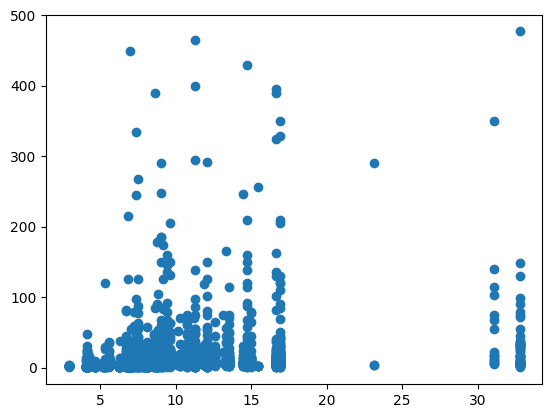

In [8]:

plt.scatter(data.district_encoder, data.price)
plt.show()